# PROJECT NAME:House Rent Prediction in India
SOURCE:https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/download?datasetVersionNumber=9
        

##### CONTEXT:

Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.

Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.

##### Dataset Glossary (Column-Wise)

1. BHK: Number of Bedrooms, Hall, Kitchen.
2. Rent: Rent of the Houses/Apartments/Flats.
3. Size: Size of the Houses/Apartments/Flats in Square Feet.
4. Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5,etc.)
5. Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
6. Area Locality: Locality of the Houses/Apartments/Flats.
7. City: City where the Houses/Apartments/Flats are Located.
8. Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
9. Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
10. Bathroom: Number of Bathrooms.
11. Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


### IMPORT LIBRARIES 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORT DATASET

In [39]:
data=pd.read_csv("House_Rent_Dataset.csv")
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [40]:
print(f"Total numbers of rows :{data.shape[0]} \nTotal numbers of columns: {data.shape[1]} ")

Total numbers of rows :4746 
Total numbers of columns: 12 


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [42]:
data2=data.copy()

### DATA CLEANING

###### 1.Missing values

In [43]:
# checking the missing values
data2.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

There is no missing values in dataset.

##### 2. Duplicate values

In [44]:
#checking the duplicate values
data2.duplicated().sum()

0

There is no duplicate vlues in dataset.

###### 3.Drop the unneccesary columns

Columns that don't contribute much to the analysis can be removed.
We can drop the posted on, point of contact, area locality,Floor columns from the dataset.

In [45]:
#droping the less valued columns
data2=data.drop(["Posted On","Point of Contact","Area Locality","Floor"],axis=1)

##### 4.Outliner removal

In [46]:
data2["Size"].unique()

array([1100,  800, 1000,  850,  600,  700,  250, 1200,  400,  375,  900,
       1286, 2000,  660,  650,  300, 1600,  355,  350,  550,  500,  630,
        270, 1500, 1300, 1068,  150,  450,  720,  680,  950, 1800,  480,
        435, 1450,  750,  220,   20,  200,  840,  740,  490,  751,  280,
        120, 1220,  670,  190,  240, 2200,  685,   44, 1110,  392,  710,
       1400,  160, 1250,  839,  230,  620, 1350,  723,  320, 2160, 1700,
        130,  505, 4000, 1190, 1012,  812,  420, 1750,  830, 1050,  960,
        756,  288,  986, 1330,  322, 3500,  957, 1430, 1320,  475,  780,
        570,  460,  530,  558,  175,  425,  721, 1150, 2210,  675, 1880,
        640, 1650,  518,  777, 2308,  890,  888,  275,  424, 2079,  586,
        610,  488,  722,  470,  410,  540,  932,  560, 3000,  696, 2500,
        715, 1337,  737,  760,  365, 2600, 1783,  565, 1514, 1080,  825,
        360, 1545,  432,  695, 1095,  790,  661,  330,  925, 1105, 1460,
        415,  585, 1755,  385,  628, 1064,  845, 19

You can see that some values, like 10, 25, and 45, are impractical for houses of that size.

In [47]:
print(data2["Size"].min(),data2["Size"].max())


10 8000


In [48]:
data2[data2["Size"]==10]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
4653,3,15000,10,Carpet Area,Hyderabad,Furnished,Bachelors/Family,3


3 bedroom with 3 bathrooms cannot be merely 10 square feet in size.
A unexpected error.
Let's assume that the minimal size for a house with one bedroom and one bathroom will be 300 sqft.

In [49]:
data2[data2.Size<300]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1
39,1,10000,270,Carpet Area,Kolkata,Semi-Furnished,Bachelors/Family,1
50,1,7500,150,Super Area,Kolkata,Furnished,Bachelors/Family,1
64,1,3500,250,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
...,...,...,...,...,...,...,...,...
4653,3,15000,10,Carpet Area,Hyderabad,Furnished,Bachelors/Family,3
4704,1,10500,150,Carpet Area,Hyderabad,Unfurnished,Bachelors/Family,1
4706,1,4500,50,Super Area,Hyderabad,Unfurnished,Bachelors/Family,1
4721,1,5500,40,Super Area,Hyderabad,Unfurnished,Bachelors/Family,1


299 rows are there where the size is less than 300. Let's get rid of this kind of data.

In [50]:
data2["BHK"].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

In [51]:
#droping the rows where the size of the house is less than 300
data3=data2[~(data2.Size/data2.BHK<300)]
data3.shape

(4198, 8)

In [52]:
data3.describe()

,BHK,Rent,Size,Bathroom
count,4198.000000,4.198000e+03,4198.000000,4198.000000
mean,2.097427,3.731154e+04,1049.929014,2.018104
std,0.836838,8.233015e+04,622.912134,0.894297
min,1.000000,1.200000e+03,300.000000,1.000000
25%,2.000000,1.000000e+04,650.000000,1.000000
50%,2.000000,1.700000e+04,900.000000,2.000000
75%,3.000000,3.500000e+04,1250.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In the rent column, the mean is more than two times the minimum value, which leads to outliers in the column.
Outliner will create problems in data modeling, so let's remove it.
As there are different cities present in the dataset,the price will vary. So we will group the rent by cities and remove the outliers.


To remove the outliers, we will apply the mean and standard deviation rule, i.e., every value in the data set falls between the mean and one standard deviation.







In [53]:
def remove_outliers(data3):
    data_out = pd.DataFrame()
    for key, subdata in data3.groupby('City'):
        m = np.mean(subdata.Rent)
        st = np.std(subdata.Rent)
        reduced_data = subdata[(subdata.Rent>(m-st)) & (subdata.Rent<=(m+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out
data4 = remove_outliers(data3)

data4.shape

(3931, 8)

C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of the Rent after outliner removal')

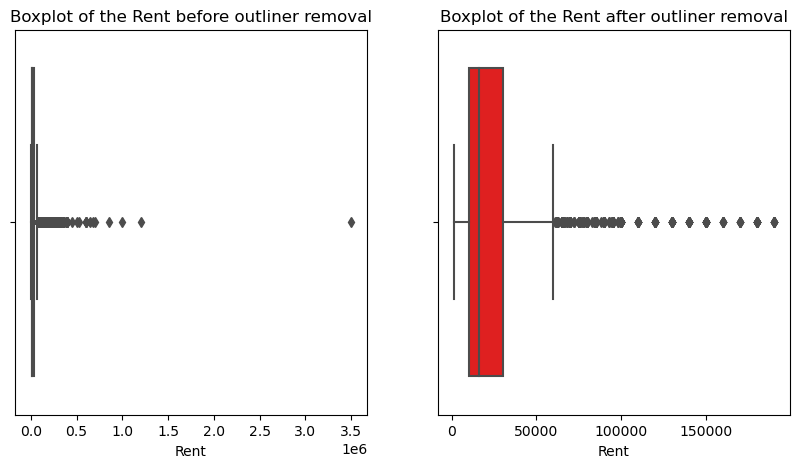

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data3.Rent,color="red",ax= ax[0]).set(title='Boxplot of the Rent before outliner removal')
sns.boxplot(data4.Rent,color="red",ax= ax[1])
plt.title('Boxplot of the Rent after outliner removal')

The values are much more better than the before values

In [55]:
data4.head(10)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,3,70000,3354,Carpet Area,Bangalore,Furnished,Bachelors/Family,3
1,2,10500,800,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2
2,2,13000,1000,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2
3,2,17000,1040,Super Area,Bangalore,Furnished,Bachelors/Family,2
4,3,21000,1403,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,3
5,2,10000,600,Super Area,Bangalore,Furnished,Bachelors/Family,1
6,4,61500,2608,Carpet Area,Bangalore,Semi-Furnished,Bachelors,3
7,2,13000,850,Carpet Area,Bangalore,Semi-Furnished,Family,2
8,1,7500,400,Super Area,Bangalore,Unfurnished,Bachelors/Family,1
9,2,17000,1000,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2


C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boxplot of the Bathroom column')]

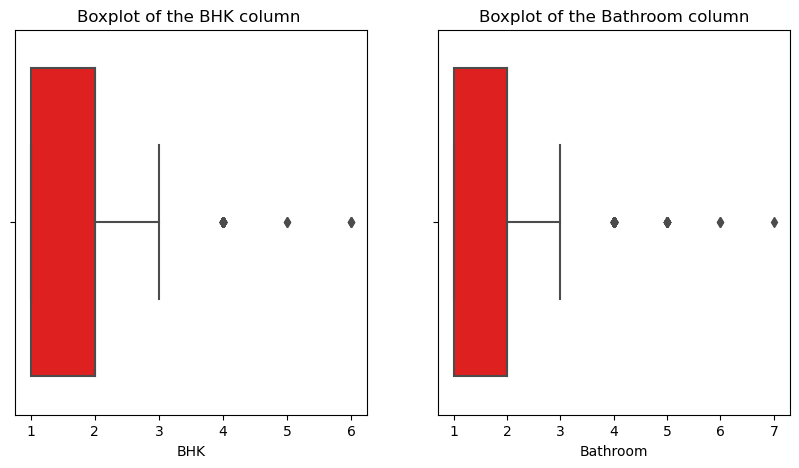

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data4.BHK,color="red",ax= ax[0]).set(title='Boxplot of the BHK column ')
sns.boxplot(data4.Bathroom,color="red",ax= ax[1]).set(title='Boxplot of the Bathroom column')

No outliners in BHK and Bathroom

# Univariant analysis

In [57]:
data4.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom'],
      dtype='object')

C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bathroom')]

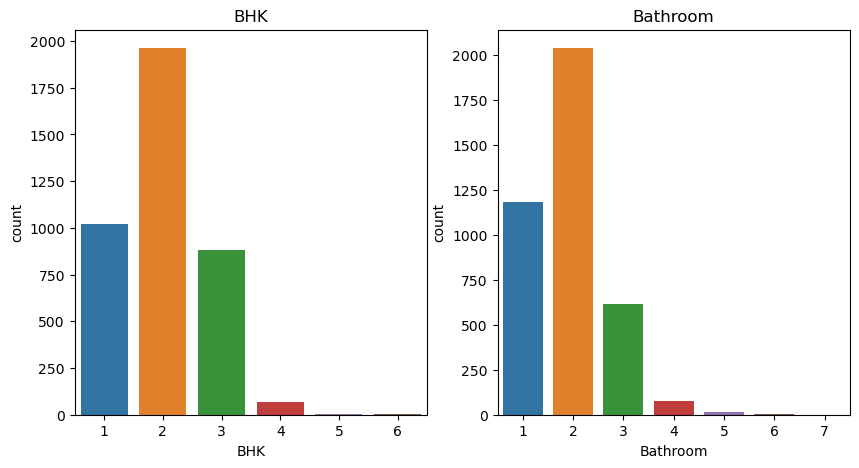

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data4.BHK,ax= ax[0]).set(title='BHK')
sns.countplot(data4["Bathroom"],ax= ax[1]).set(title='Bathroom')


Most of the houses have 2 bedrooms with 2 bathrooms.

C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'City')]

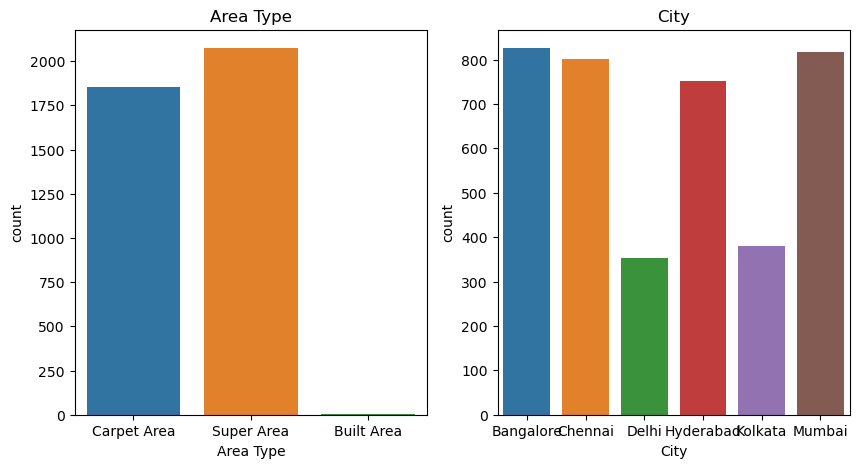

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data4["Area Type"],ax= ax[0]).set(title='Area Type')
sns.countplot(data4["City"],ax= ax[1]).set(title='City')

Maximum house area types are given in super Area followed by carpet Area.
Mumbai, Bangalore, and Chennai are the three most-wanted cities for renters in the dataset.

C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Soumya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Tenant Preferred')]

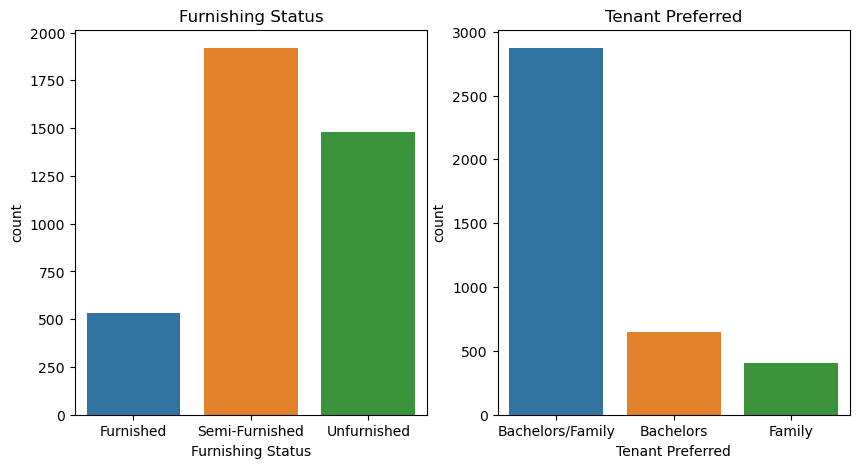

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data4["Furnishing Status"],ax= ax[0]).set(title='Furnishing Status')
sns.countplot(data4["Tenant Preferred"],ax= ax[1]).set(title='Tenant Preferred')

The highest number of houses are semi-furnished, and most of the house owners allow both bachelors and families.

# Multivariant Analysis


<AxesSubplot:xlabel='BHK', ylabel='Rent'>

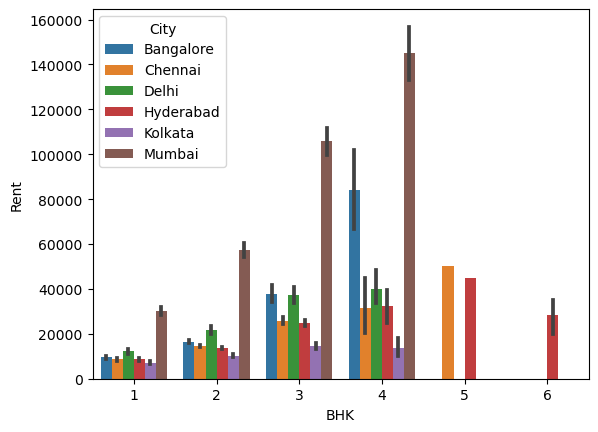

In [61]:
#
sns.barplot(x = data4["BHK"], y = data4["Rent"],hue=data4["City"])

In [25]:
data4.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom'],
      dtype='object')

<AxesSubplot:xlabel='Area Type', ylabel='Rent'>

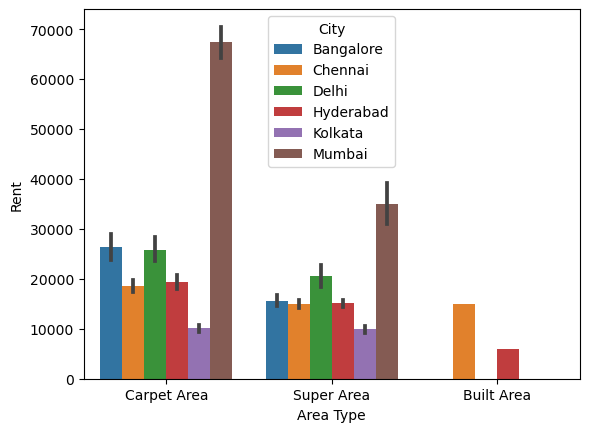

In [62]:
sns.barplot(x = data4["Area Type"], y = data4["Rent"],hue=data4["City"])

<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

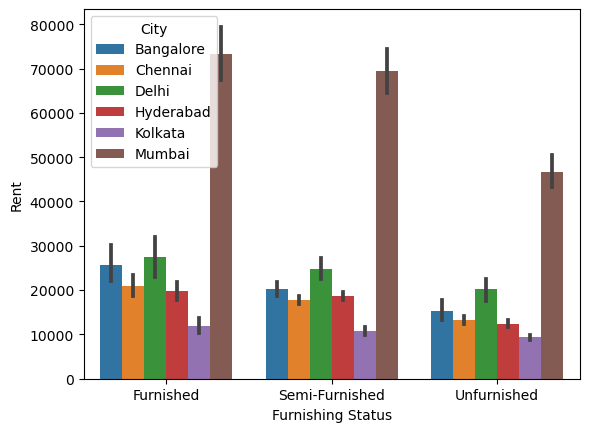

In [63]:
sns.barplot(x = data4["Furnishing Status"], y = data4["Rent"],hue=data4["City"])

<AxesSubplot:xlabel='Tenant Preferred', ylabel='Rent'>

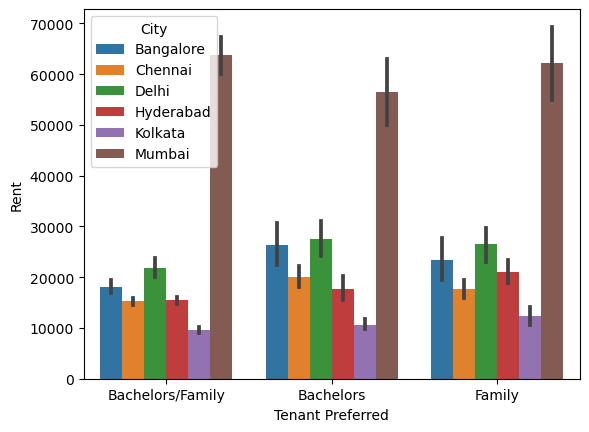

In [64]:
sns.barplot(x = data4["Tenant Preferred"], y = data4["Rent"],hue=data4["City"])

From the above analysis, we can conclude that Mumbai is the most expensive city of them all.

In [29]:
md=data4[(data4["City"]=='Mumbai')]
md2=md.sort_values("Rent")
md2.tail(20)


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
3731,3,180000,1500,Carpet Area,Mumbai,Furnished,Bachelors/Family,4
3661,4,180000,1691,Carpet Area,Mumbai,Semi-Furnished,Bachelors/Family,6
3604,3,180000,1190,Carpet Area,Mumbai,Semi-Furnished,Bachelors/Family,3
3427,4,180000,1750,Carpet Area,Mumbai,Semi-Furnished,Bachelors,4
3200,4,180000,2000,Carpet Area,Mumbai,Furnished,Bachelors/Family,5
3431,3,180000,1200,Carpet Area,Mumbai,Semi-Furnished,Bachelors/Family,3
3610,3,180000,1100,Carpet Area,Mumbai,Furnished,Family,3
3292,3,180000,1550,Carpet Area,Mumbai,Semi-Furnished,Bachelors/Family,3
3649,3,180000,1250,Carpet Area,Mumbai,Semi-Furnished,Family,3
3339,3,180000,1600,Carpet Area,Mumbai,Semi-Furnished,Bachelors/Family,4


# Modelling

In [66]:
data5=data4.copy()
cols = ["Area Type","City","Furnishing Status","Tenant Preferred"]
from sklearn.preprocessing import LabelEncoder
data5[cols] = data5[cols].apply(LabelEncoder().fit_transform)
#
data5

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,3,70000,3354,1,0,0,1,3
1,2,10500,800,2,0,1,1,2
2,2,13000,1000,2,0,1,1,2
3,2,17000,1040,2,0,0,1,2
4,3,21000,1403,2,0,1,1,3
...,...,...,...,...,...,...,...,...
3926,2,45000,670,1,5,2,1,2
3927,2,65000,960,1,5,1,1,2
3928,2,65000,1500,2,5,1,1,3
3929,1,35000,500,2,5,1,1,1


In [68]:
#identify the dependent and independent variables
X = data5.drop('Rent',axis=1)
Y = data5['Rent']

In [69]:
X

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,3,3354,1,0,0,1,3
1,2,800,2,0,1,1,2
2,2,1000,2,0,1,1,2
3,2,1040,2,0,0,1,2
4,3,1403,2,0,1,1,3
...,...,...,...,...,...,...,...
3926,2,670,1,5,2,1,2
3927,2,960,1,5,1,1,2
3928,2,1500,2,5,1,1,3
3929,1,500,2,5,1,1,1


In [70]:

Y

0       70000
1       10500
2       13000
3       17000
4       21000
        ...  
3926    45000
3927    65000
3928    65000
3929    35000
3930    90000
Name: Rent, Length: 3931, dtype: int64

In [71]:
#Split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

### Linear Regression model

##### Training the Linear Regression model on the Training set

In [72]:
from sklearn.linear_model import LinearRegression
regressorLR=LinearRegression()
regressorLR.fit(X_train,Y_train)


LinearRegression()

##### Predicting the Test set results

In [73]:
Y_predLR=regressorLR.predict(X_test)


##### Calculate the r-square means 

In [74]:
from sklearn.metrics import r2_score
r2_scoreLR=r2_score(Y_test, Y_predLR)
r2_scoreLR

0.4847383966849983

### Decision Tree Regression 

##### Training the Decision Tree Regression model on the Training set

In [75]:
from sklearn.tree import DecisionTreeRegressor
regressorDTR = DecisionTreeRegressor(random_state = 0)
regressorDTR.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

##### Predicting the Test set results

In [76]:
Y_predDTR = regressorDTR.predict(X_test)

##### Calculate the r-square means

In [77]:
from sklearn.metrics import r2_score
r2_scoreDTR=r2_score(Y_test, Y_predDTR)
r2_scoreDTR

0.6194710294286498

### Random Forest Regression


##### Training the Random Forest Regression model on the whole dataset

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressorRFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressorRFR.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

##### Predicting the Test set results

In [80]:
Y_predRFR = regressorRFR.predict(X_test)

##### Calculate the r-square means

In [81]:
from sklearn.metrics import r2_score
r2_scoreRFR=r2_score(Y_test, Y_predRFR)
r2_scoreRFR

0.7905659153401051

### Support Vector Regression (SVR)

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
Y_train=Y_train.reshape(-1,1)
Y_train = sc_y.fit_transform(Y_train)

##### Training the Support Vector Regression (SVR) model on the whole dataset

In [82]:
from sklearn.svm import SVR
regressorSVR = SVR(kernel = 'rbf')
regressorSVR.fit(X_train, Y_train)

SVR()

##### Predicting the Test set results

In [86]:
y_predSVR =regressorSVR.predict(X_test)

##### Calculate the r-square means

In [89]:
from sklearn.metrics import r2_score
r2_scoreSVR=r2_score(Y_test, y_predSVR)
r2_scoreSVR

-0.14885282307343783

In [97]:
print(f"r2_score value of linear Regression:{r2_scoreLR}\nr2_score value of Decision Tree Regression:{r2_scoreDTR}\nr2_score value of Random Forest Regression:{r2_scoreRFR}\nr2_score value ofSupport Vector Regression :{r2_scoreSVR}" )

r2_score value of linear Regression:0.4847383966849983
r2_score value of Decision Tree Regression:0.6194710294286498
r2_score value of Random Forest Regression:0.7905659153401051
r2_score value ofSupport Vector Regression :-0.14885282307343783


Here, the random forest regression model will be the best model for prediction.